In [126]:
tree1 = SixB(get_NMSSM(450,300))
tree2 = SixB(get_NMSSM(1200,900))

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
.. initializing old FeynNet model
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-900_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
.. initializing old FeynNet model


In [84]:
from utils.analysis.particle import Particle

In [127]:
t1_hx_b1 = Particle(tree1, 'gen_HX_b1_recojet')
t1_hx_b2 = Particle(tree1, 'gen_HX_b2_recojet')
t1_hx = t1_hx_b1 + t1_hx_b2

t1_h1_b1 = Particle(tree1, 'gen_H1_b1_recojet')
t1_h1_b2 = Particle(tree1, 'gen_H1_b2_recojet')
t1_h1 = t1_h1_b1 + t1_h1_b2

t1_h2_b1 = Particle(tree1, 'gen_H2_b1_recojet')
t1_h2_b2 = Particle(tree1, 'gen_H2_b2_recojet')
t1_h2 = t1_h2_b1 + t1_h2_b2

In [128]:
t2_hx_b1 = Particle(tree2, 'gen_HX_b1_recojet')
t2_hx_b2 = Particle(tree2, 'gen_HX_b2_recojet')
t2_hx = t2_hx_b1 + t2_hx_b2

t2_h1_b1 = Particle(tree2, 'gen_H1_b1_recojet')
t2_h1_b2 = Particle(tree2, 'gen_H1_b2_recojet')
t2_h1 = t2_h1_b1 + t2_h1_b2

t2_h2_b1 = Particle(tree2, 'gen_H2_b1_recojet')
t2_h2_b2 = Particle(tree2, 'gen_H2_b2_recojet')
t2_h2 = t2_h2_b1 + t2_h2_b2

In [129]:
m1 = ak.concatenate((t1_hx.m, t1_h1.m, t1_h2.m))
m2 = ak.concatenate((t2_hx.m, t2_h1.m, t2_h2.m))

In [118]:
import uproot
f = uproot.open("hhh_m.root")
n,e = f['fit'].to_numpy()
x = (e[:-1] + e[1:])/2

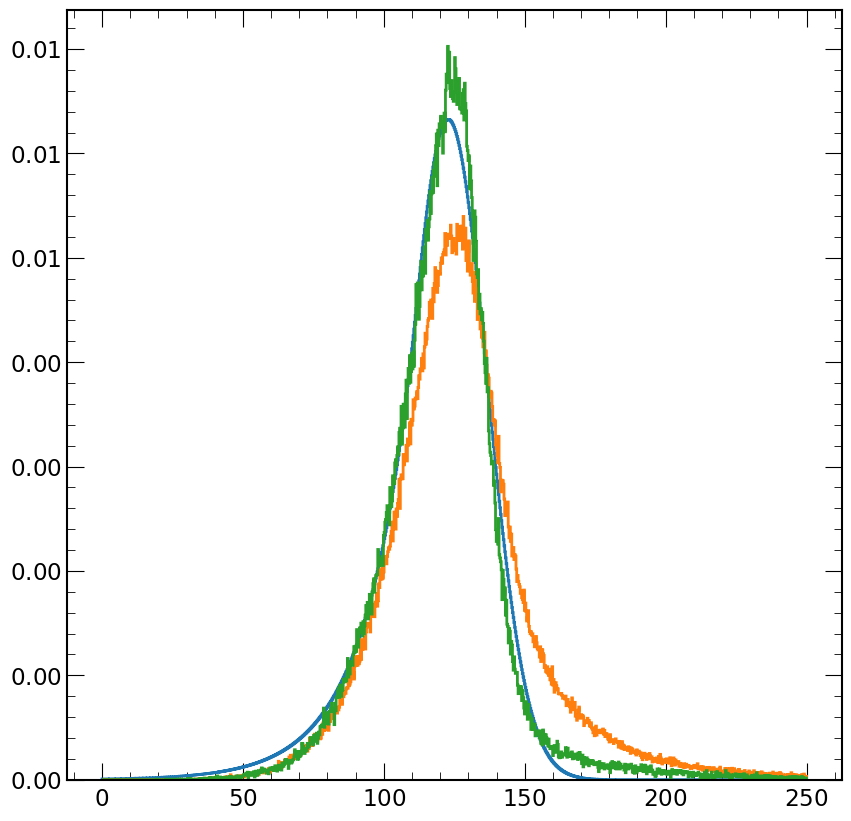

In [130]:
fig, ax = plt.subplots()

fit = Hist(x, weights=n, bins=e, ax=ax, label='fit', density=True)
n1_h = Hist(m1, bins=e, ax=ax, label='450,300', density=True)
n2_h = Hist(m2, bins=e, ax=ax, label='1200,900', density=True)
plt.show()

In [113]:
from matplotlib.gridspec import GridSpec

(0.0, 2.0)

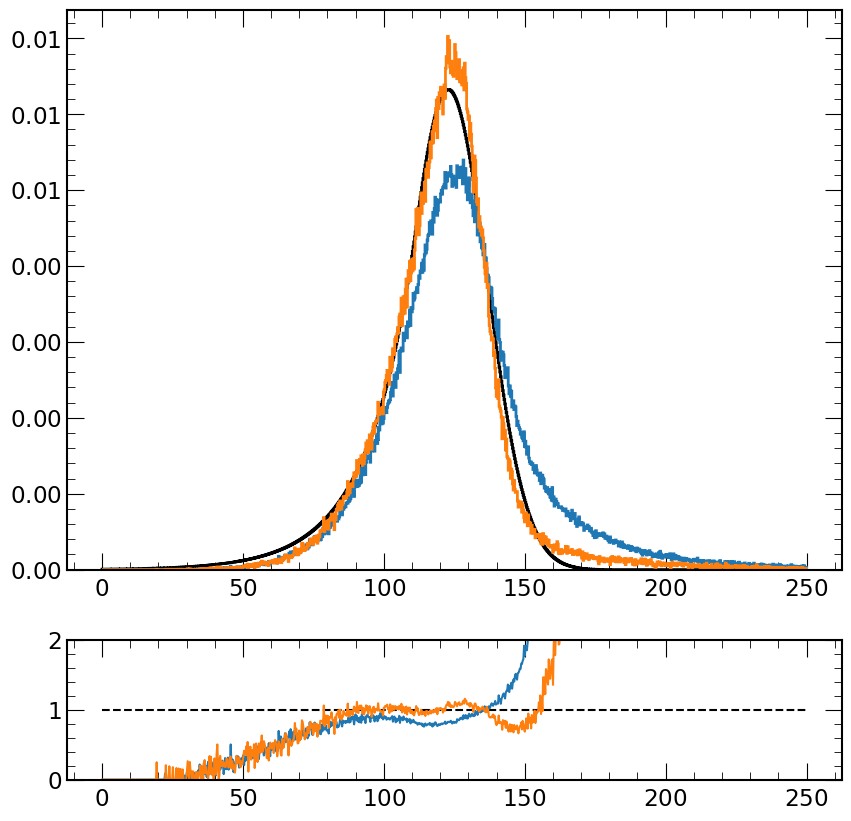

In [133]:
fig = plt.figure()
gs = fig.add_gridspec(2,1, height_ratios=[4,1])

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])

fit = Hist(x, weights=n, bins=e, ax=ax1, label='fit', density=True, color='k')
n1_h = Hist(m1, bins=e, ax=ax1, label='450,300', density=True)
n2_h = Hist(m2, bins=e, ax=ax1, label='1200,900', density=True)

ax2.plot([0,250],[1,1], 'k--')
ratio1 = np.where(n1_h == fit, 1, n1_h/fit)
ratio2 = np.where(n2_h == fit, 1, n2_h/fit)
ax2.plot(x, ratio1)
ax2.plot(x, ratio2)
ax2.set_ylim(0,2)

In [134]:
from utils.plotter import NewRatio

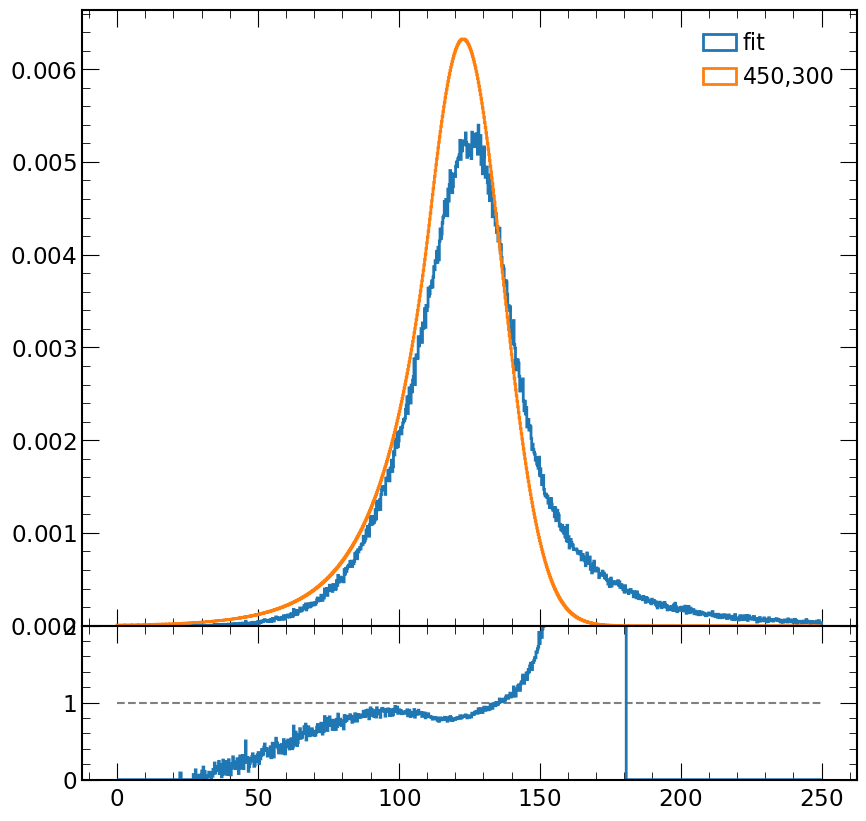

In [147]:
ax1, ax2 = NewRatio(x, x, bins=e, weights=[n1_h,fit], labels=['fit','450,300'])

In [51]:
import uproot
f = uproot.open("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1000_MY_550/ntuple.root")
t = f['sixBtree']
ak.count(t['jet_pt'].array(), axis=1)

<Array [6, 6, 6, 6, 6, 6, 6, 6, ..., 6, 6, 6, 6, 6, 6, 6] type='33407 * int64'>

In [ ]:
import os, uproot, re
base = 'combine/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg'
masspoints = os.listdir(base)
masspoints = [m for m in masspoints if 'MX_' in m]

In [ ]:
cmd = "python scripts/generate_combine_root_files.py /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-XXX_MY-YYY_TuneCP5_13TeV-madgraph-pythia8/ntuple.root"

In [ ]:
f = uproot.open("combine/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/MX_400_MY_250.root")
t = f.keys()
for i,mass in enumerate(masspoints):
    f = uproot.open(f"{base}/{mass}")
    if not f.keys() == t: 
        # print(mass)
        mx = int(re.search("MX_(.*)\_MY", mass).group(1))
        my = int(re.search("MY_(.*)\.root", mass).group(1))
        print(f"python scripts/generate_combine_root_files.py /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-{mx}_MY-{my}_TuneCP5_13TeV-madgraph-pythia8/ntuple.root")

In [ ]:
import uproot
f = uproot.open("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1000_MY_800_2M/ntuple.root")
t = f["sixBtree"]
t['jet_pt'].array()

<Array [[337, 34.4, 121, ..., 100, 302], ...] type='1228989 * var * float32'>

In [ ]:
SixB("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/syst/JEReta/down/NMSSM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root")

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/syst/JEReta/down/NMSSM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/syst/JEReta/down/NMSSM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgraph-pythia8.root


FileNotFoundError: file not found

    '/eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/syst/JEReta/down/NMSSM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgraph-pythia8.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [ ]:
def f(x, mu=125, sigma1=25, sigma2=75):
    sigma = np.repeat(sigma2, len(x))
    sigma = np.where(x < mu, sigma1, sigma)
    return np.exp(-0.5*(x-mu)**2/sigma**2)

In [ ]:
x = np.linspace(0,300,1000)
y = f(x)
rank = 1-y

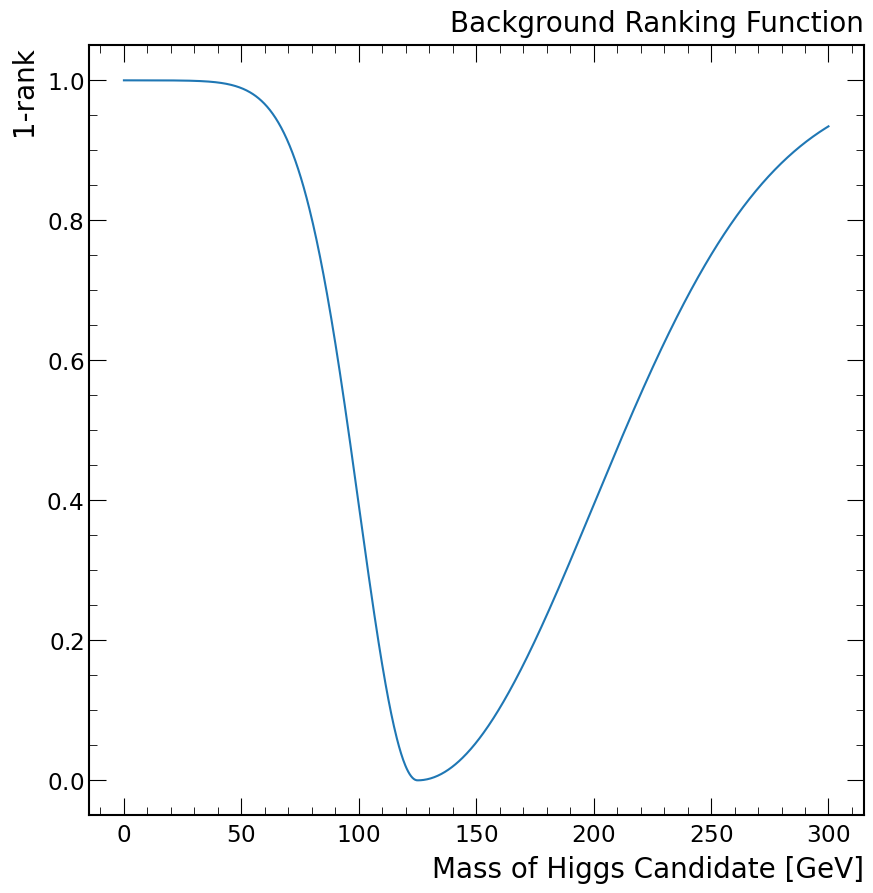

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, rank)
# ax.plot([125,125], [0,1], color='gray', linestyle='--')

ax.set_title('Background Ranking Function')
ax.set_ylabel('1-rank')
ax.set_xlabel('Mass of Higgs Candidate [GeV]')

fig.savefig('plots/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/bkg_ranking.pdf', bbox_inches='tight')

In [ ]:
import uproot
from tqdm import tqdm

In [ ]:
def getMinMax(fname):
    f = uproot.open(fname)
    e = f['Events']
    runs = e['run'].array()
    return int(min(runs)), int(max(runs))

In [ ]:
with open("/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/MultiHiggs/analysis/MultiHAnalysis/input/Run2_UL/RunIISummer20UL18NanoAODv9/JetHT_Run2018D.txt", "r") as fi:
    lines = fi.readlines()
    lines = [line.strip('\n') for line in lines]
    print(len(lines))

232


In [ ]:
rmin, rmax = np.array(()), np.array(())
for line in tqdm(lines):
    tmin, tmax = getMinMax(line)
    rmin = np.append(rmin, tmin)
    rmax = np.append(rmax, tmax)
print(f"{int(rmin.min())}-{int(rmax.max())}")

  0%|          | 0/232 [00:00<?, ?it/s]

100%|██████████| 232/232 [44:19<00:00, 11.47s/it]

320500-325175


In [ ]:
import uproot
f = uproot.open("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root")
t = f["sixBtree"]
ak.any(t['jet_hadronFlav'].array() == 4, axis=1)

<Array [False, False, False, ..., False, False, False] type='52797 * bool'>